# We're going to compute a halo orbit

In [5]:
using ThreeBodyProblem
using DifferentialEquations
using Plots
using LinearAlgebra

In [6]:
sys = earth_moon()
sys.name

"Earth/Moon"

## Remember, we can create a custom system

In [7]:
## Use the following syntax
sys = System(ThreeBodyProblem.SUN, ThreeBodyProblem.EARTH)

System(Body(1.98847e30, 695700.0, 0.0, 0.0, "Sun", :yellow), Body(5.97237e24, 6371.0084, 1.495978976276167e8, 3.155814910224e7, "Earth", :blue), 1.3271645321e11, 398613.89090999996, 3.0034911575429927e-6, 1.495978976276167e8, 695700.0, 6371.0084, 3.155814910224e7, 1.495978976276167e8, 5.022635424452555e6, 29.784741472435698, 5.930102218335328e-6, "Sun/Earth")

## Now, we are going to compute our first guess at a Halo Orbit using Richardson's expansion

### The details are complicated, but if you're curious check out this paper

#### D. L. Richardson, “Analytic Construction Of Periodic Orbits About The Collinear Points,” Celest. Mech., vol. 22, no. 3, pp. 241–253, 1980, doi: 10.1007/BF01229511.

In [85]:
Az = 0.001 # The amplitude of the orbit in the z direction
Lpt = 2 # Which libration point will I center about
NS = 1
npts = 100
t, rvs, T, Ax = rich3(sys, Az, Lpt, NS, npts)

([-0.0; -0.03130993066454046; … ; -3.068373205124964; -3.0996831357895043], [1.0084225350657474 0.0 … 0.00946368499438901 0.0; 1.0084235568453723 -0.0002960596904601177 … 0.009439965208142968 1.6336202861218245e-6; … ; 1.0084235568453723 0.000296059690460126 … 0.009439965208142966 -1.6336202861218705e-6; 1.0084225350657474 9.47868662660598e-18 … 0.00946368499438901 -5.293192235114822e-20], -3.099683135789505, 0.14002450533941277)

## Let's plot the orbit to see what it looks like

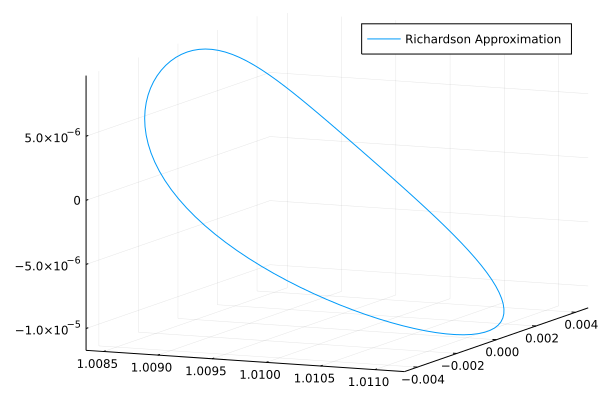

In [122]:
plot(rvs[:,1],rvs[:,2],rvs[:,3],label="Richardson Approximation")

## Remember, this is a third order approximation. What will happen if we actually integrate this trajectory?

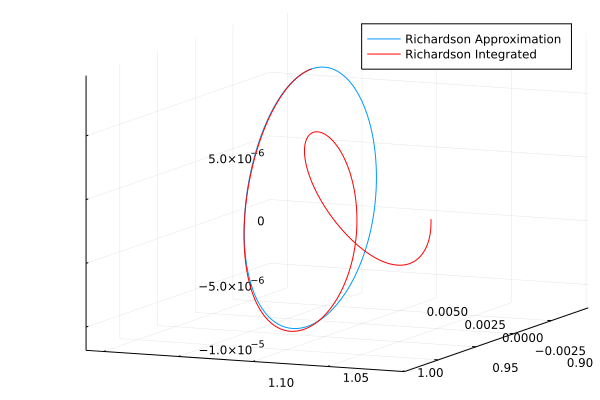

In [123]:
tspan = (0., T)
prob = ODEProblem(CR3BPdynamics!,rvs[1,:],tspan,sys)
sol = solve(prob, reltol=1e-12)
plot!(sol,vars=(1,2,3),label="Richardson Integrated",linecolor=:red)

## We can see that this orbit diverges before completing a period. We need to use a differential corrector to hone in on the true periodic orbit.

In [124]:
myconst = 3
rv₀, ttf = differential_corrector(sys, rvs[1,:], myconst, tf=T)

([1.0083823369407119, 0.0, 9.124939940557929e-6, 0.0, 0.009751606881315206, 0.0], -3.102523755226522)

## Now we've corrected our initial condition, and when we integrate the orbit, it returns to its initial state

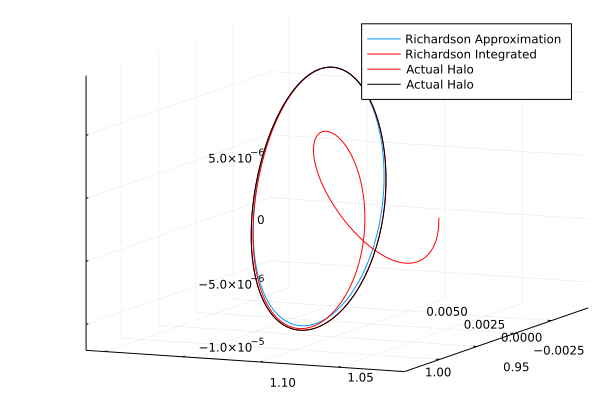

In [126]:
prob = ODEProblem(CR3BPdynamics!,rv₀,tspan,sys)
sol = solve(prob, reltol=1e-12)
plot!(sol,vars=(1,2,3),color=:black,label="Actual Halo")

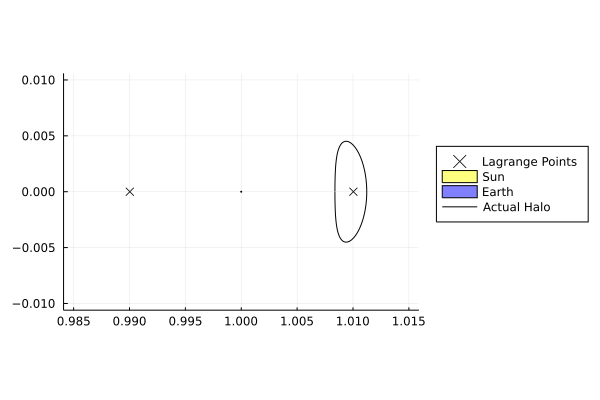

In [133]:
plot(sys)
plot!(sol,vars=(1,2),color=:black,label="Actual Halo")
plot!(aspect_ratio=:equal,ylims=[-0.01,0.01],xlims=[0.985,1.015],legend=:outerright,flip=false)